# <span style="color : purple"> **Comprehensive Assessment : Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks**</span>

## **Objective**

#### You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.

### Installing keras and tensorflow tools 

In [17]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Installing required libraries

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.optimizers import Adam

## **Load the Diabetes dataset**

In [20]:
from sklearn.datasets import load_diabetes

In [21]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

## **Exploratory Data Analysis**

### Converting X to dataframe and y to series

In [57]:
X_df = pd.DataFrame(X, columns=diabetes.feature_names)
y_series = pd.Series(y, name="target")

In [69]:
X_cols=X_df.columns
X_cols

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

### Descriptive statistics for features

In [59]:
print(X_df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

### Descriptive statistics for target variable

In [60]:
print(y_series.describe())

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


### Info for features

In [61]:
print(X_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


### Info for target variable

In [62]:
print(y_series.info())

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB
None


In [63]:
X_df.shape

(442, 10)

In [64]:
y_series.shape

(442,)

## **Visualization**

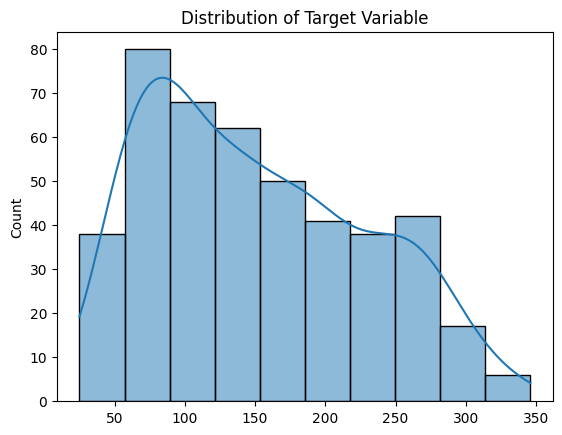

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y, kde=True)
plt.title("Distribution of Target Variable")
plt.show()

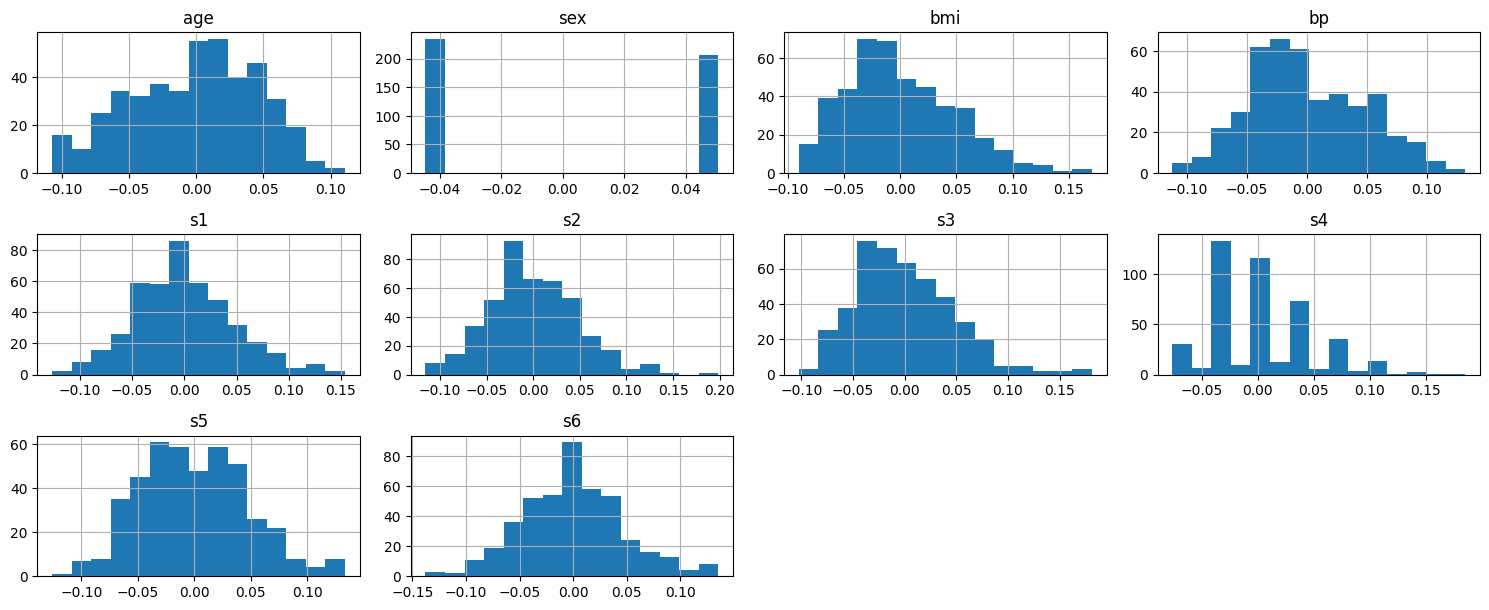

In [71]:
X_df[X_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

### Split the data into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Preprocessing

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

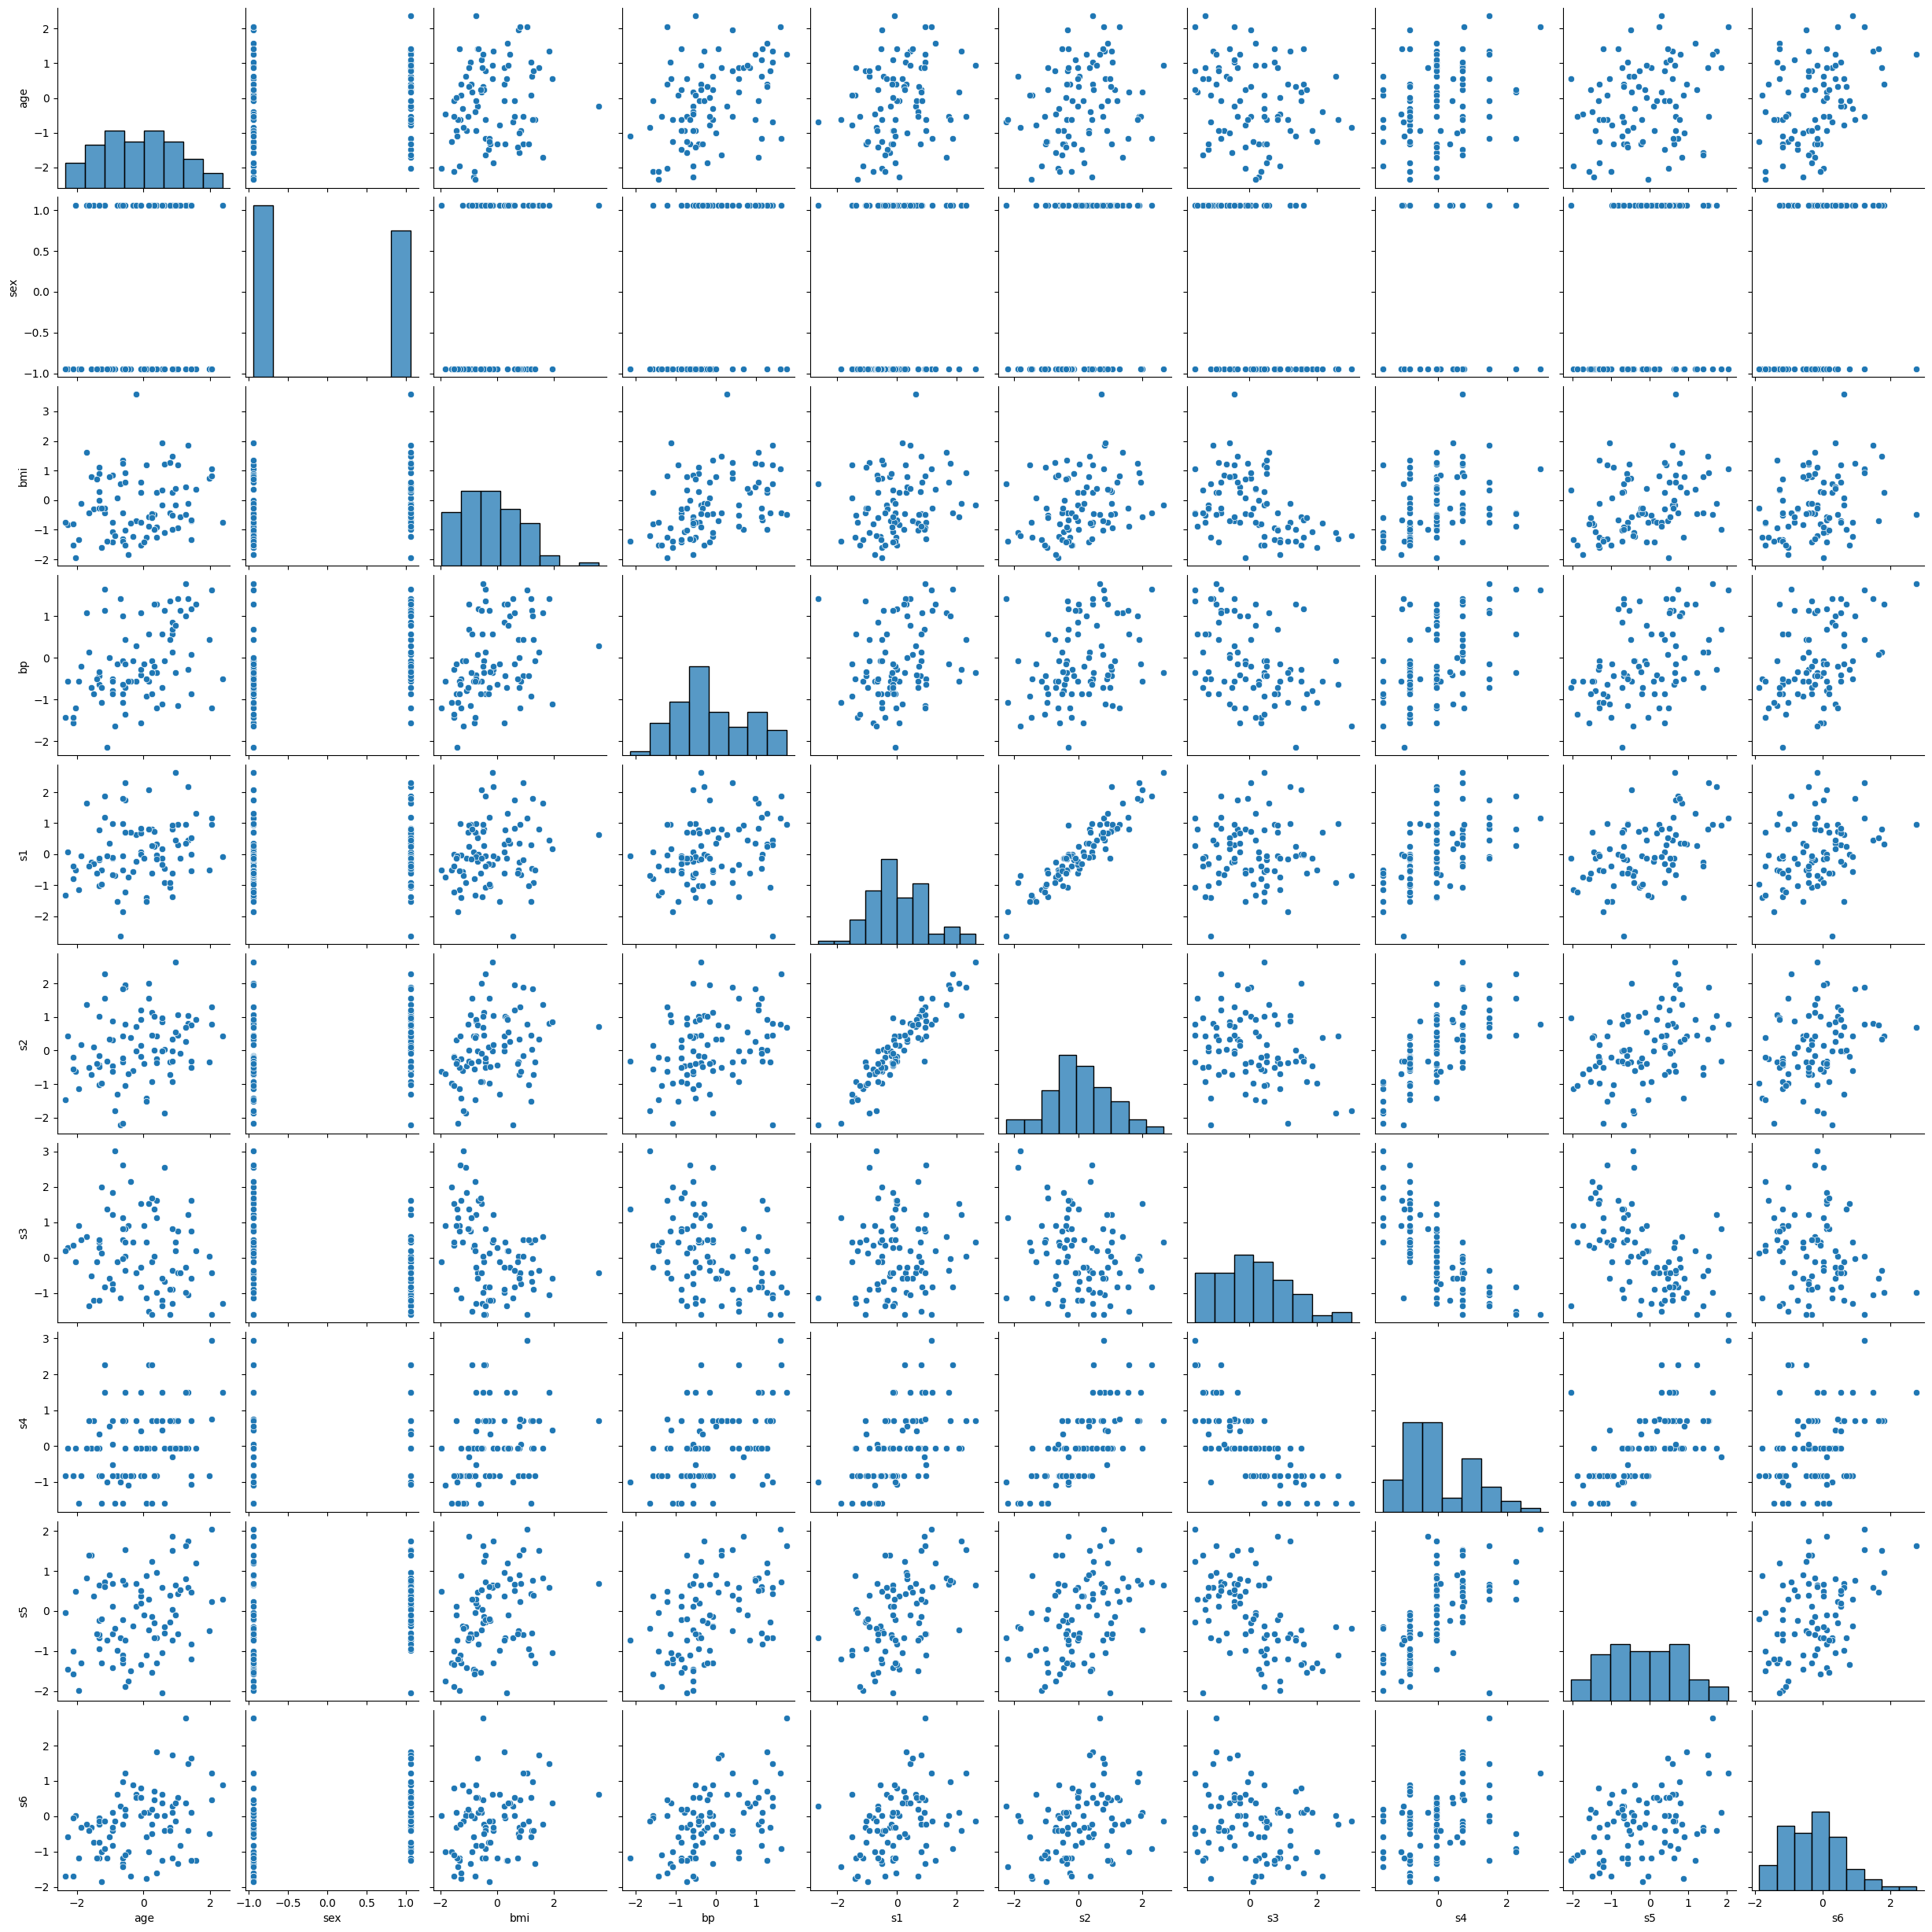

In [54]:
sns.pairplot(pd.DataFrame(X_test, columns=diabetes.feature_names))
plt.show()

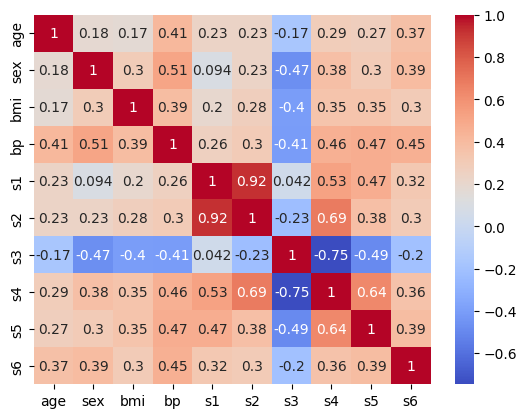

In [55]:
sns.heatmap(pd.DataFrame(X_test, columns=diabetes.feature_names).corr(), annot=True, cmap='coolwarm')
plt.show()

## **Create a Deep Neural Network model**

In [27]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 


C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [30]:
# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 28426.7988 - mean_absolute_error: 150.4055
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29116.6699 - mean_absolute_error: 153.0440 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28816.2930 - mean_absolute_error: 150.6126 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29265.8691 - mean_absolute_error: 152.7050 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27609.1543 - mean_absolute_error: 147.2752 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28822.4238 - mean_absolute_error: 150.5209 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27157.3789 - mean_absolute_error: 145.5787 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27777.1758 - mean_absolute_error: 145.6414 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25977.3730 - mean_absolute_error: 140.7832 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23410.2461 - m

In [31]:
print(y_train.shape)
print(y_test.shape)

(353,)
(89,)


### **Evaluate the model**

In [34]:
loss, mean_absolute_error = model.evaluate(X_test, y_test)
print("Mean Absolute Error :", mean_absolute_error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3250.9041 - mean_absolute_error: 46.2465 
Mean Absolute Error : 44.376853942871094


In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

## **Creation of ANN with 50 hidden layers**

In [38]:
input_dim = X_train.shape[1]  # Automatically match to the dataset's number of features

# Number of hidden layers
num_hidden_layers = 50

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=input_dim))

for _ in range(num_hidden_layers - 1):
    model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1))  # Output layer with 1 neuron for regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 30148.4336 - mean_absolute_error: 154.9333
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28977.7461 - mean_absolute_error: 151.5636
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10919.0498 - mean_absolute_error: 82.4599
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8802.6895 - mean_absolute_error: 72.7757 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4954.2378 - mean_absolute_error: 56.6216
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2997.0486 - mean_absolute_error: 45.2042
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5652.6436 - mean_absolute_error: 58.5475
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4915.4727 - mean_absolute_error: 55.0032
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3060.7861 - mean_absolute_error: 46.3305
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3449.4124 - mean_absolute_error: 

### **Evaluate the model**

In [39]:
loss, mean_absolute_error = model.evaluate(X_test, y_test)
print("Mean Absolute Error :", mean_absolute_error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4587.3843 - mean_absolute_error: 57.1345  
Mean Absolute Error : 56.274227142333984


#### Mean absolute error is 56.27

## **Improving the model**

### Experiment with Feedforward Neural Network

In [40]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 29070.7012 - mean_absolute_error: 152.9415 - val_loss: 22151.3906 - val_mean_absolute_error: 132.9488
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32403.1953 - mean_absolute_error: 162.4384 - val_loss: 21816.5391 - val_mean_absolute_error: 131.7659
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29262.1816 - mean_absolute_error: 152.3840 - val_loss: 21298.0000 - val_mean_absolute_error: 129.9144
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29396.9609 - mean_absolute_error: 152.1842 - val_loss: 20476.1191 - val_mean_absolute_error: 126.9306
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27709.2930 - mean_absolute_error: 147.1282 - val_loss: 19181.3496 - val_mean_absolute_error: 122.1077
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24412.8379 - mean_absolute_error: 136.9347 - val_loss: 17243.7637 - val_mean_absolute_error: 114.5550
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

### **Evaluate the model**

In [41]:
loss, mean_absolute_error = model.evaluate(X_test, y_test)
print("Mean Absolute Error :", mean_absolute_error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2944.5571 - mean_absolute_error: 43.3806 
Mean Absolute Error : 41.84474182128906


#### Mean absolute error has decreased from 56.27 to 41.84

### Experiment with activation functions

In [42]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(LeakyReLU(alpha=0.01))  # Leaky ReLU activation function

for _ in range(3):
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 30482.6445 - mean_absolute_error: 154.3092 - val_loss: 21708.9590 - val_mean_absolute_error: 131.2507
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29057.5723 - mean_absolute_error: 151.4191 - val_loss: 19026.3516 - val_mean_absolute_error: 120.9018
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24108.1504 - mean_absolute_error: 134.8061 - val_loss: 11399.7559 - val_mean_absolute_error: 85.8975
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13062.3184 - mean_absolute_error: 91.2047 - val_loss: 3936.9631 - val_mean_absolute_error: 50.9558
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7401.0322 - mean_absolute_error: 70.0010 - val_loss: 3626.8250 - val_mean_absolute_error: 49.9021
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4889.2871 - mean_absolute_error: 55.9739 - val_loss: 3584.1819 - val_mean_absolute_error: 43.0318
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4040.4734 - 

### **Evaluate the model**

In [43]:
loss, mean_absolute_error = model.evaluate(X_test, y_test)
print("Mean Absolute Error :", mean_absolute_error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3056.1157 - mean_absolute_error: 41.0055 
Mean Absolute Error : 41.669586181640625


#### Mean absolute error has decreased from 56.27 to 41.67

### Experiment with different hyperparameters

In [44]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=input_dim))

# Hidden layers
for _ in range(3):
    model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(1))

# Experiment with different optimizers and learning rates
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model with different batch sizes
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 29069.7852 - mean_absolute_error: 152.8677 - val_loss: 22375.3008 - val_mean_absolute_error: 133.7020
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31794.6172 - mean_absolute_error: 159.5613 - val_loss: 22270.9395 - val_mean_absolute_error: 133.3291
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28830.2539 - mean_absolute_error: 151.6507 - val_loss: 22115.4902 - val_mean_absolute_error: 132.7741
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30087.4492 - mean_absolute_error: 155.2805 - val_loss: 21867.1934 - val_mean_absolute_error: 131.8849
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28988.2559 - mean_absolute_error: 152.5886 - val_loss: 21468.3633 - val_mean_absolute_error: 130.4484
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28634.9531 - mean_absolute_error: 152.3317 - val_loss: 20823.6172 - val_mean_absolute_error: 128.1180
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━

### **Evaluate the model**

In [45]:
loss, mean_absolute_error = model.evaluate(X_test, y_test)
print("Mean Absolute Error :", mean_absolute_error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3305.5366 - mean_absolute_error: 46.6838 
Mean Absolute Error : 44.50194549560547


#### Mean absolute error has decreased from 56.27 to 44.5